# **< Section 4 Project : 딥러닝 파이프라인 구축해보기>**
####- 주제 = CNN을 사용한 자율주행차용 차선 감지 코드 구현
####- 기간 = 2021.06.29 ~ 2021.07.02 

## **<목  차>**
------------------
#### 1. 배 경
#### 2. 진행 일정
#### 3. 코드 작성, 실행
#### 4. 결과
#### 5. 느낀점

###**1. 배 경**

#### - 데이터 선정
　└ 국내외 모빌리티 업계 트렌드<br>
　　※ 출처 : [한국교통연구원](https://www.koti.re.kr/user/bbs/BD_selectBbs.do?q_bbsCode=1082&q_bbscttSn=20200409095730728), [현대자동차저널(HMG) 2019.4](https://news.hmgjournal.com/Tech/reissue-autonomous-recognition)

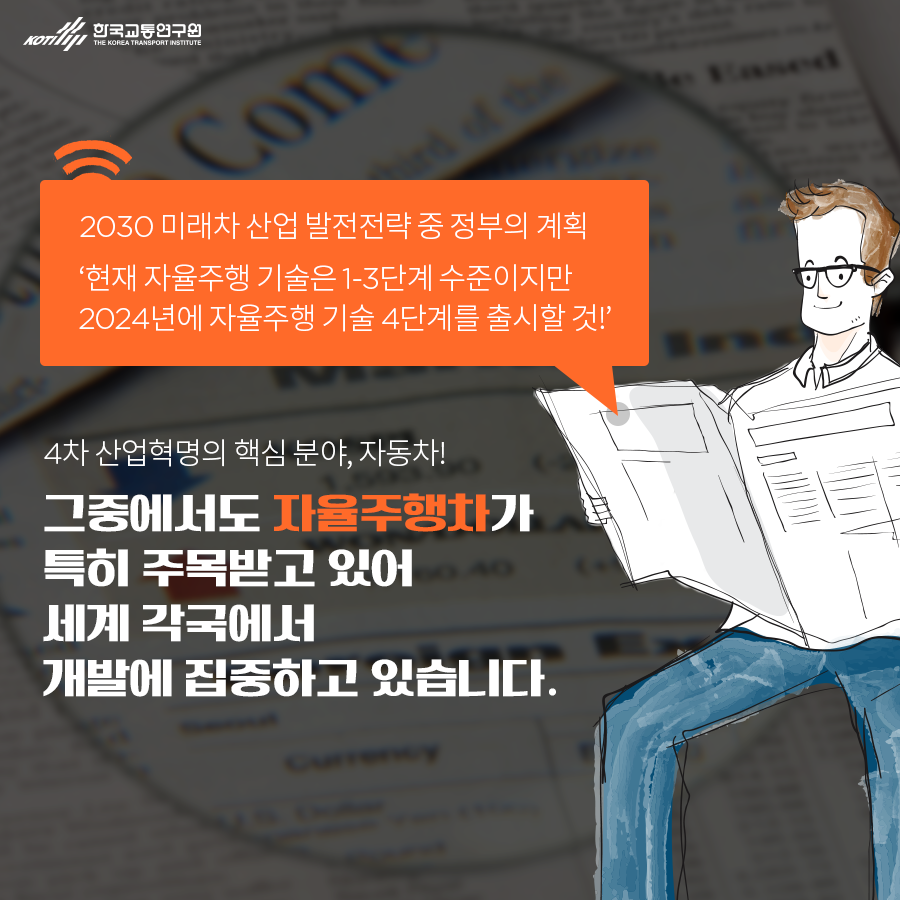

In [29]:
from urllib import request
import time
from PIL import Image
from io import BytesIO

url = "https://www.koti.re.kr/webcontent/ckeditor/2020/4/9/bd050528-b7e7-4c75-b27c-a48fad8f7b99.png"
res = request.urlopen(url).read()# request.urlopen()
img = Image.open(BytesIO(res))  # Image open
img

**< 미국자동차공학회(SAE) 발표 자율주행 기술 수준 정의>**<br><br>
Level 0 자율주행 기술과 아무런 관련이 없는 단계<br>
**Level 1 차선이탈경보, 긴급제동 등 기능이 있지만 운전자의 개입이 필요한 단계**<br>
Level 2 자동차 스스로 속도 조절하고 스티어링 휠을 돌릴 수 있는 단계<br>
Level 3 모니터링을 사람이 아닌 시스템이! 도로 장애물도 피할 수 있는 단계<br>
Level 4 일반 운행뿐만 아니라 골목, 커브, 돌발상황에도 민첩하게 대응하는 단계<br>
Level 5 운전자가 불필요한 무인 자동차! 100% 맡겨도 불안하지 않은 단계<br>

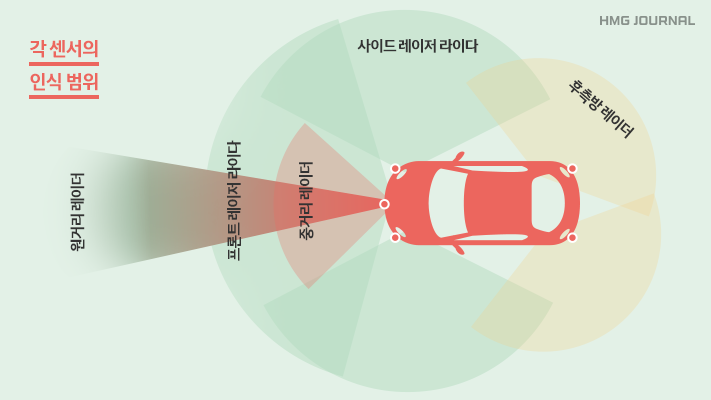

In [27]:
# 현대자동차 기술 소개
url2 = "https://blog.hmgjournal.com/images_n/contents/190409_raider02.png"
res2 = request.urlopen(url2).read() # request.urlopen()
img2 = Image.open(BytesIO(res2))  # Image open
img2

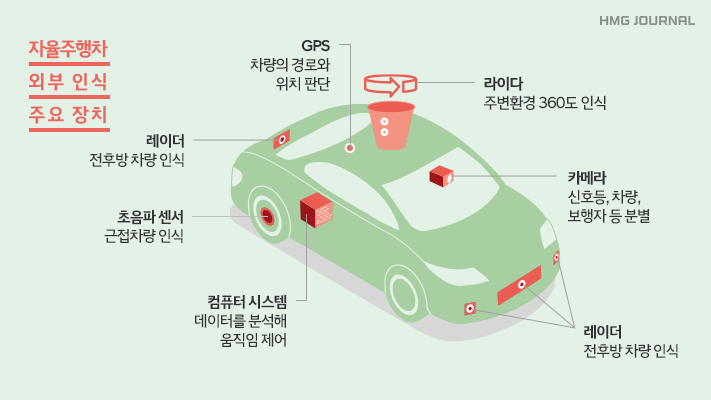

In [28]:
# 현대자동차 기술 소개
url3 = "https://blog.hmgjournal.com/images_n/contents/190409_raider03.png"
res3 = request.urlopen(url3).read()
img3 = Image.open(BytesIO(res3))
img3

[< 현대자동차 채용 공고 내용 확인 (2021.4)>](https://young.hyundai.com/hyundai/recruiting/detail.do?seq=2951)<br>
[R&D] 자율주행 영상인식 SW 개발 <br>
> **조직 소개** <br>
우리 조직은 보편적 안전과 선택적 편의라는 개발 철학을 바탕으로 부분 자율주행(Lv 0-3) 시스템 및 완전 자율주행(Lv 4-5) 시스템을 개발하고 있습니다. 인지/판단/제어 SW를 자체적으로 개발하고 있으며, 통합제어기를 중심으로 하는 확장형 아키텍처를 바탕으로 부분 자율주행 기술의 양산 차종 적용 및 완전 자율주행 시범운행을 하고 있습니다.

> **수행 직무** <br>
카메라 딥러닝 영상인식 기술 개발
- 전방 카메라, 전측방 카메라, 후측방 카메라, 전방위 카메라 자율주행/자율주차 영상인식 기술 개발
- 영상인식 ***딥러닝*** 네트워크 개발
- 영상 전처리/후처리 알고리즘 개발
- 카메라 Calibration 기술 개발
- 카메라, 라이다 이종센서 기반 ***딥러닝*** 인식기술 개발, ***딥러닝*** 네트워크 최적화
- 멀티노드 서버기반 ***딥러닝*** 네트워크 학습 속도 개선
- 영상인식 ***딥러닝*** 네트워크 성능, 속도 최적화
- ***딥러닝*** 네트워크 자동화 SW 개발, ***딥러닝*** 영상인식 기술 임베디드 SW 개발
- PC 기반 영상인식 알고리즘 SW Integration 및 최적화 개발
- 제어기 기반 영상인식 알고리즘 SW Integration 및 최적화 개발




### **2. 진행 일정**
　└ 차선 감지 학습용 데이터 수배 및 모델 찾기 (06.29~06.30)<br>

　└ 딥러닝 모델 구현 및 하이퍼파라미터 변경, 최적화 (07.01) <br>

　└ 최종 정리 및 발표 (07.02) <br>

　　*※ 자료 출처 : https://github.com/mvirgo/MLND-Capstone* <br>

###**3. 코드 작성, 실행**

In [1]:
# google drive 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 작업에 필요한 라이브러리 설치
! pip install scipy==1.2.2
! pip install kora

     |████████████████████████████████| 24.8MB 121kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [32]:
# 프로젝트에 사용할 영상 확인

print("딥러닝 적용 전 영상\n")
from kora.drive import upload_public
url = upload_public('/content/drive/MyDrive/project_video.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=700 controls/>""")

딥러닝 적용 전 영상



In [ ]:
# 영상 데이터 형태 = 80 x 160 x 3 (RGB channel)
# 레이블 데이터 형태 = 80 x 160 x 1 (G channel)

# 라이브러리 불러오기

import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [ ]:
# 모델 만들기 (기본)

def create_model(input_shape, pool_size):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 1
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 2
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Pooling 4
    model.add(MaxPooling2D(pool_size=pool_size))


    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 2
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 4
    model.add(UpSampling2D(size=pool_size))

    # Deconv 4
    model.add(Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model


# 데이터 불러와서 학습

def main():
    train_images = pickle.load(open("/content/drive/MyDrive/full_CNN_train.p", "rb" ))
    labels = pickle.load(open("/content/drive/MyDrive/full_CNN_labels.p", "rb" ))

    # Make into arrays
    train_images = np.array(train_images)
    labels = np.array(labels)

    # Normalize labels
    labels = labels / 255

    # Shuffle images along with their labels
    train_images, labels = shuffle(train_images, labels)
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

    # setting parameters
    batch_size = 64
    epochs = 10
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]

    # create_model
    model = create_model(input_shape, pool_size)

    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Compiling and training the model
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val)
                        )
    
    # Save model architecture and weights
    model.save('/content/drive/MyDrive/full_CNN_model.h5')

    model.summary()

if __name__ == '__main__':
    main()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
159/159 [==============================] - 40s 53ms/step - loss: 0.0397 - accuracy: 0.9246 - val_loss: 0.0270 - val_accuracy: 0.9489
Epoch 2/10
159/159 [==============================] - 8s 47ms/step - loss: 0.0175 - accuracy: 0.9507 - val_loss: 0.0133 - val_accuracy: 0.9542
Epoch 3/10
159/159 [==============================] - 7s 46ms/step - loss: 0.0132 - accuracy: 0.9537 - val_loss: 0.0107 - val_accuracy: 0.9553
Epoch 4/10
159/159 [==============================] - 7s 46ms/step - loss: 0.0115 - accuracy: 0.9548 - val_loss: 0.0095 - val_accuracy: 0.9561
Epoch 5/10
159/159 [==============================] - 7s 46ms/step - loss: 0.0106 - accuracy: 0.9555 - val_loss: 0.0089 - val_accuracy: 0.9565
Epoch 6/10
159/159 [==============================] - 7s 46ms/step - loss: 0.0100 - accuracy: 0.9559 - val_loss: 0.0086 - val_accuracy: 0.9567
Epoch 7/10
159/159 [==============================] - 7s 47ms/step - loss: 0.0095 - accuracy: 0.9562 - val_loss: 0.0086 - val_accuracy: 0.956

In [ ]:
# 모델 만들기 (변경사항 = 층 증가, drop out 변경)

def create_model(input_shape, pool_size):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape)) 
    
    # Conv Layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))


    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Deconv 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Deconv 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model.add(Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model


# 데이터 불러와서 학습

def main():
    train_images = pickle.load(open("/content/drive/MyDrive/full_CNN_train.p", "rb" ))
    labels = pickle.load(open("/content/drive/MyDrive/full_CNN_labels.p", "rb" ))

    # Make into arrays
    train_images = np.array(train_images)
    labels = np.array(labels)

    # Normalize labels
    labels = labels / 255

    # Shuffle images along with their labels
    train_images, labels = shuffle(train_images, labels)
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

    # setting parameters
    batch_size = 64
    epochs = 10
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]

    # create_model
    model = create_model(input_shape, pool_size)

    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Compiling and training the model
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val)
                        )
    
    # Save model architecture and weights
    model.save('/content/drive/MyDrive/full_CNN_model.h5')

    model.summary()

if __name__ == '__main__':
    main()    # 13s 163ms/step - loss: 0.0100 - accuracy: 0.9562 - val_loss: 0.0118 - val_accuracy: 0.9544
                # 13s 81ms/step - loss: 0.0081 - accuracy: 0.9572 - val_loss: 0.0080 - val_accuracy: 0.9575 (batch 64, epochs 10)  -- 이상 dropout 0.4
                # 13s 81ms/step - loss: 0.0109 - accuracy: 0.9565 - val_loss: 0.0391 - val_accuracy: 0.9409 dropout 0.5
                # 13s 82ms/step - loss: 0.0053 - accuracy: 0.9610 - val_loss: 0.0047 - val_accuracy: 0.9613 dropout 0.2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
159/159 [==============================] - 48s 92ms/step - loss: 0.0388 - accuracy: 0.9256 - val_loss: 0.0164 - val_accuracy: 0.9537
Epoch 2/10
159/159 [==============================] - 13s 80ms/step - loss: 0.0124 - accuracy: 0.9546 - val_loss: 0.0096 - val_accuracy: 0.9567
Epoch 3/10
159/159 [==============================] - 13s 80ms/step - loss: 0.0098 - accuracy: 0.9566 - val_loss: 0.0086 - val_accuracy: 0.9574
Epoch 4/10
159/159 [==============================] - 13s 80ms/step - loss: 0.0086 - accuracy: 0.9577 - val_loss: 0.0076 - val_accuracy: 0.9596
Epoch 5/10
159/159 [==============================] - 13s 80ms/step - loss: 0.0075 - accuracy: 0.9596 - val_loss: 0.0063 - val_accuracy: 0.9604
Epoch 6/10
159/159 [==============================] - 13s 80ms/step - loss: 0.0066 - accuracy: 0.9601 - val_loss: 0.0055 - val_accuracy: 0.9607
Epoch 7/10
159/159 [==============================] - 13s 81ms/step - loss: 0.0062 - accuracy: 0.9604 - val_loss: 0.0051 - val_accuracy:

In [ ]:
# 모델 만들기 (층 하나 더 늘려보기)

def create_model(input_shape, pool_size):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))
    
    # Conv Layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 8
    model.add(Conv2D(256, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv8'))
    model.add(Dropout(0.2))

    # Pooling 4
    model.add(MaxPooling2D(pool_size=pool_size))


    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Deconv 3
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Deconv 6
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))
    model.add(Dropout(0.2))

    # Upsample 4
    model.add(UpSampling2D(size=pool_size))

    # Deconv 7
    model.add(Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv7'))

    # Final layer
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model


# 데이터 불러와서 학습

def main():
    train_images = pickle.load(open("/content/drive/MyDrive/full_CNN_train.p", "rb" ))
    labels = pickle.load(open("/content/drive/MyDrive/full_CNN_labels.p", "rb" ))

    # Make into arrays
    train_images = np.array(train_images)
    labels = np.array(labels)

    # Normalize labels
    labels = labels / 255

    # Shuffle images along with their labels
    train_images, labels = shuffle(train_images, labels)
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

    # setting parameters
    batch_size = 64
    epochs = 10
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]

    # create_model
    model = create_model(input_shape, pool_size)

    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Compiling and training the model
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val)
                        )
    
    # Save model architecture and weights
    model.save('/content/drive/MyDrive/full_CNN_model.h5')

    model.summary()

if __name__ == '__main__':
    main()    # 14s 87ms/step - loss: 0.0071 - accuracy: 0.9581 - val_loss: 0.0063 - val_accuracy: 0.9587 (층 하나 늘려봤는데 큰 효과 없음)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
159/159 [==============================] - 50s 102ms/step - loss: 0.0489 - accuracy: 0.9126 - val_loss: 0.0367 - val_accuracy: 0.9372
Epoch 2/10
159/159 [==============================] - 14s 88ms/step - loss: 0.0148 - accuracy: 0.9533 - val_loss: 0.0142 - val_accuracy: 0.9532
Epoch 3/10
159/159 [==============================] - 14s 88ms/step - loss: 0.0108 - accuracy: 0.9563 - val_loss: 0.0093 - val_accuracy: 0.9568
Epoch 4/10
159/159 [==============================] - 14s 87ms/step - loss: 0.0096 - accuracy: 0.9569 - val_loss: 0.0085 - val_accuracy: 0.9574
Epoch 5/10
159/159 [==============================] - 14s 87ms/step - loss: 0.0089 - accuracy: 0.9572 - val_loss: 0.0071 - val_accuracy: 0.9580
Epoch 6/10
159/159 [==============================] - 14s 86ms/step - loss: 0.0084 - accuracy: 0.9574 - val_loss: 0.0074 - val_accuracy: 0.9581
Epoch 7/10
159/159 [==============================] - 14s 87ms/step - loss: 0.0079 - accuracy: 0.9576 - val_loss: 0.0073 - val_accuracy

In [ ]:
# 모델 만들기 (BatchNorm. He 사용)

def create_model2(input_shape, pool_size):
    model2 = Sequential()
    model2.add(BatchNormalization(input_shape=input_shape)) 

    # Conv Layer 1
    model2.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv1'))

    # Conv Layer 2
    model2.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv2'))

    # Pooling 1
    model2.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model2.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv3'))
    model2.add(Dropout(0.2))
    

    # Conv Layer 4
    model2.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv4'))
    model2.add(Dropout(0.2))

    # Conv Layer 5
    model2.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv5'))
    model2.add(Dropout(0.2))

    # Pooling 2
    model2.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model2.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv6'))
    model2.add(Dropout(0.2))

    # Conv Layer 7
    model2.add(Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Conv7'))
    model2.add(Dropout(0.2))

    # Pooling 3
    model2.add(MaxPooling2D(pool_size=pool_size))


    # Upsample 1
    model2.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model2.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Deconv1'))
    model2.add(Dropout(0.2))

    # Deconv 2
    model2.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Deconv2'))
    model2.add(Dropout(0.2))

    # Upsample 2
    model2.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model2.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Deconv3'))
    model2.add(Dropout(0.2))

    # Deconv 4
    model2.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Deconv4'))
    model2.add(Dropout(0.2))

    # Deconv 5
    model2.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Deconv5'))
    model2.add(Dropout(0.2))

    # Upsample 3
    model2.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model2.add(Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Deconv6'))

    # Final layer - only including one channel so 1 filter
    model2.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_initializer = 'he_normal', name = 'Final'))

    return model2


# 데이터 불러와서 학습

def main():
    train_images = pickle.load(open("/content/drive/MyDrive/full_CNN_train.p", "rb" ))
    labels = pickle.load(open("/content/drive/MyDrive/full_CNN_labels.p", "rb" ))

    # Make into arrays
    train_images = np.array(train_images)
    labels = np.array(labels)

    # Normalize labels
    labels = labels / 255

    # Shuffle images along with their labels
    train_images, labels = shuffle(train_images, labels)
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

    # setting parameters
    batch_size = 64
    epochs = 10
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]

    # create_model
    model = create_model(input_shape, pool_size)

    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Compiling and training the model
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val)
                        )
    
    # Save model architecture and weights
    model.save('/content/drive/MyDrive/full_CNN_model.h5')

    model.summary()

if __name__ == '__main__':
    main()        # 15s 91ms/step - loss: 0.0087 - accuracy: 0.9570 - val_loss: 0.0184 - val_accuracy: 0.9466 (Conv 다음에 batchnorm 넣었을 때)
                    # 14s 86ms/step - loss: 0.1519 - accuracy: 0.8283 - val_loss: 0.1505 - val_accuracy: 0.8296 (인코더에만 batchnorm + 모두 He 초기값)
                    # 13s 82ms/step - loss: 0.1531 - accuracy: 0.8257 - val_loss: 0.1529 - val_accuracy: 0.8292 (뒤만 He 초기값 넣었을 떄)    -- 이상 drop out 0.4
                    # 13s 82ms/step - loss: 0.0172 - accuracy: 0.9490 - val_loss: 0.0175 - val_accuracy: 0.9454 (모두 He값 적용했을 때, dropout 0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
159/159 [==============================] - 48s 93ms/step - loss: 0.7365 - accuracy: 0.8269 - val_loss: 0.1518 - val_accuracy: 0.8295
Epoch 2/10
159/159 [==============================] - 13s 80ms/step - loss: 0.1488 - accuracy: 0.8300 - val_loss: 0.1458 - val_accuracy: 0.8295
Epoch 3/10
159/159 [==============================] - 13s 80ms/step - loss: 0.1359 - accuracy: 0.8380 - val_loss: 0.1257 - val_accuracy: 0.8409
Epoch 4/10
159/159 [==============================] - 13s 80ms/step - loss: 0.1162 - accuracy: 0.8480 - val_loss: 0.0727 - val_accuracy: 0.8556
Epoch 5/10
159/159 [==============================] - 13s 80ms/step - loss: 0.0601 - accuracy: 0.8935 - val_loss: 0.0509 - val_accuracy: 0.8967
Epoch 6/10
159/159 [==============================] - 13s 81ms/step - loss: 0.0336 - accuracy: 0.9304 - val_loss: 0.0273 - val_accuracy: 0.9336
Epoch 7/10
159/159 [==============================] - 13s 81ms/step - loss: 0.0246 - accuracy: 0.9416 - val_loss: 0.0242 - val_accuracy:

In [ ]:
# 모델 만들기 (과적합 방지, L2 적용)

from keras.regularizers import l2

def create_model(input_shape, pool_size):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))  

    # Conv Layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))


    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Deconv 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Deconv 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model.add(Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Deconv6'))

    # Final layer - only including one channel so 1 filter
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), name = 'Final'))

    return model


# 데이터 불러와서 학습

def main():
    train_images = pickle.load(open("/content/drive/MyDrive/full_CNN_train.p", "rb" ))
    labels = pickle.load(open("/content/drive/MyDrive/full_CNN_labels.p", "rb" ))

    # Make into arrays
    train_images = np.array(train_images)
    labels = np.array(labels)

    # Normalize labels
    labels = labels / 255

    # Shuffle images along with their labels
    train_images, labels = shuffle(train_images, labels)
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

    # setting parameters
    batch_size = 64
    epochs = 10
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]

    # create_model
    model = create_model(input_shape, pool_size)

    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Compiling and training the model
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val)
                        )
    
    # Save model architecture and weights
    model.save('/content/drive/MyDrive/full_CNN_model.h5')

    model.summary()

if __name__ == '__main__':
    main()    # 13s 83ms/step - loss: 0.0234 - accuracy: 0.9495 - val_loss: 0.0236 - val_accuracy: 0.9498 (l2 0.01)
                # 13s 84ms/step - loss: 0.0126 - accuracy: 0.9562 - val_loss: 0.0121 - val_accuracy: 0.9565 (l2 0.001)  -- 이상 인코더에만 적용
                # 14s 86ms/step - loss: 0.0252 - accuracy: 0.9533 - val_loss: 0.0276 - val_accuracy: 0.9513 (l2 0.001) 
                # 14s 85ms/step - loss: 0.0142 - accuracy: 0.9572 - val_loss: 0.0135 - val_accuracy: 0.9573 (l2 0.0001)  -- 인코더, 디코더 적용

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
159/159 [==============================] - 49s 98ms/step - loss: 0.1966 - accuracy: 0.9091 - val_loss: 0.0835 - val_accuracy: 0.9482
Epoch 2/10
159/159 [==============================] - 14s 88ms/step - loss: 0.0638 - accuracy: 0.9502 - val_loss: 0.0502 - val_accuracy: 0.9523
Epoch 3/10
159/159 [==============================] - 14s 86ms/step - loss: 0.0442 - accuracy: 0.9518 - val_loss: 0.0411 - val_accuracy: 0.9504
Epoch 4/10
159/159 [==============================] - 14s 87ms/step - loss: 0.0359 - accuracy: 0.9523 - val_loss: 0.0339 - val_accuracy: 0.9520
Epoch 5/10
159/159 [==============================] - 14s 85ms/step - loss: 0.0313 - accuracy: 0.9527 - val_loss: 0.0291 - val_accuracy: 0.9536
Epoch 6/10
159/159 [==============================] - 14s 85ms/step - loss: 0.0287 - accuracy: 0.9530 - val_loss: 0.0305 - val_accuracy: 0.9511
Epoch 7/10
159/159 [==============================] - 14s 85ms/step - loss: 0.0266 - accuracy: 0.9536 - val_loss: 0.0267 - val_accuracy:

In [ ]:
# 모델 만들기 (epochs 증가 : 10 → 20)

def create_model(input_shape, pool_size):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))  

    # Conv Layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))


    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Deconv 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Deconv 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model.add(Conv2DTranspose(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer - only including one channel so 1 filter
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model


# 데이터 불러와서 학습

def main():
    train_images = pickle.load(open("/content/drive/MyDrive/full_CNN_train.p", "rb" ))
    labels = pickle.load(open("/content/drive/MyDrive/full_CNN_labels.p", "rb" ))

    # Make into arrays
    train_images = np.array(train_images)
    labels = np.array(labels)

    # Normalize labels
    labels = labels / 255

    # Shuffle images along with their labels
    train_images, labels = shuffle(train_images, labels)
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

    # setting parameters
    batch_size = 64
    epochs = 10
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]

    # create_model
    model = create_model(input_shape, pool_size)

    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Compiling and training the model
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val)
                        )
    
    # Save model architecture and weights
    model.save('/content/drive/MyDrive/full_CNN_model.h5')

    model.summary()

if __name__ == '__main__':
    main()    # 13s 84ms/step - loss: 0.0047 - accuracy: 0.9614 - val_loss: 0.0043 - val_accuracy: 0.9615 epochs 20으로 증가

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
159/159 [==============================] - 48s 96ms/step - loss: 0.0474 - accuracy: 0.9169 - val_loss: 0.0176 - val_accuracy: 0.9526
Epoch 2/20
159/159 [==============================] - 13s 83ms/step - loss: 0.0144 - accuracy: 0.9537 - val_loss: 0.0113 - val_accuracy: 0.9554
Epoch 3/20
159/159 [==============================] - 13s 84ms/step - loss: 0.0114 - accuracy: 0.9557 - val_loss: 0.0093 - val_accuracy: 0.9567
Epoch 4/20
159/159 [==============================] - 14s 85ms/step - loss: 0.0100 - accuracy: 0.9566 - val_loss: 0.0085 - val_accuracy: 0.9574
Epoch 5/20
159/159 [==============================] - 13s 84ms/step - loss: 0.0091 - accuracy: 0.9571 - val_loss: 0.0078 - val_accuracy: 0.9577
Epoch 6/20
159/159 [==============================] - 13s 83ms/step - loss: 0.0086 - accuracy: 0.9574 - val_loss: 0.0081 - val_accuracy: 0.9577
Epoch 7/20
159/159 [==============================] - 13s 84ms/step - loss: 0.0081 - accuracy: 0.9576 - val_loss: 0.0072 - val_accuracy:

In [ ]:
# 준비한 모델 사용, 차선 감지 영상 만들기

import numpy as np
import cv2
from scipy import misc
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from tensorflow.keras.models import load_model

In [ ]:
# 모델에 맞도록 이미지 조정 및 차선 감지 코드 작성

# Class to average lanes with
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image):

    small_img = misc.imresize(image, (80, 160, 3))
    
    small_img = np.array(small_img)
    small_img = small_img[None,:,:,:]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = misc.imresize(lane_drawn, (720, 1280, 3))

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result

In [ ]:
# 학습한 영상 불러와서 원래 영상 데이터에 씌우기

%%time

if __name__ == '__main__':
    # Load Keras model
    model = load_model('/content/drive/MyDrive/full_CNN_model.h5')

    # Create lanes object
    lanes = Lanes()

    # Where to save the output video
    vid_output = '/content/drive/MyDrive/project_test_hyper.mp4'

    # Location of the input video
    clip1 = VideoFileClip("/content/drive/MyDrive/project_video.mp4")

    # Create the clip
    vid_clip = clip1.fl_image(road_lines)

    vid_clip.write_videofile(vid_output, audio=False)

[MoviePy] >>>> Building video /content/drive/MyDrive/project_test_hyper.mp4
[MoviePy] Writing video /content/drive/MyDrive/project_test_hyper.mp4


100%|█████████▉| 1260/1261 [02:18<00:00,  9.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/project_test_hyper.mp4 

CPU times: user 1min 46s, sys: 7.37 s, total: 1min 54s
Wall time: 2min 23s


In [35]:
print("딥러닝 적용 후 영상\n")
from kora.drive import upload_public
url = upload_public('/content/drive/MyDrive/project_test1.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=700 controls/>""")

딥러닝 적용 후 영상



In [34]:
# 결과 확인

print("하이퍼파라미터 조정 후 영상\n")
from kora.drive import upload_public
url = upload_public('/content/drive/MyDrive/project_test_hyper.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=700 controls/>""")

하이퍼파라미터 조정 후 영상



### **4. Hyperparameter 학습 결과**

|No.|모  델|변경사항|Param.|loss|accuracy|val_loss|val_acc|결과|
|---|:------:|--------|:--------:|:----:|:----:|:----:|:----:|-----|
|1|기본|4→4, batch = 64, dropout = 0.4|84,845개|0.0086|0.9569|0.0077|0.9574|
|2|변경|7→7, batch = 128, dropout = 0.4|281,933개|0.0100|0.9562|0.0118|0.9544|
|3|↑|7→7, batch = 64, dropout = 0.4|↑|0.0081|0.9572|0.0080|0.9575|
|4|↑|7→7, batch = 64, dropout = 0.5|↑|0.0109|0.9565|0.0391|0.9409|
|5|↑|7→7, batch = 64, dropout = 0.2|↑|0.0053|0.9610|0.0047|0.9613|
|6|층 증가|8→8, batch = 64, dropout = 0.2|872,141개|0.0071|0.9581|0.0063|0.9587|
|7|BatchNorm|7→7, batch = 64, dropout = 0.2|281,933개|0.0087|0.9570|0.0184|0.9466|
|8|He 반영|7→7, batch = 64, dropout = 0.2|↑|0.0172|0.9490|0.0175|0.9454|
|9|L2 적용|7→7, ↑, L2=0.001|↑|0.0252|0.9533|0.0276|0.9513|
|10|↑|7→7, ↑, L2=0.0001|↑|0.0142|0.9572|0.0135|0.9573|
|11|epochs 증가|7→7, ↑, epochs = 20|↑|0.0047|0.9614|0.0043|0.9615|★|

**<해당 데이터의 최적 조건>**
- 구조 : 7→ 7
- batch_size=64
- dropout=0.2
- epochs=20

### **5. 느낀점**
- Section 4 프로젝트로 느낀 점 <br>
└ 딥러닝 필요성, 효과성, 개발 현황 (다양한 모델)<br>

- 데이터 중요성 <br>
└ 데이터 수준(해외/국내), label data(labeling)

- 실습의 한계 (모델, 데이터 크기 등) <br>
└ 모델 만들기 (참고 논문 / github 구현), 고용량 데이터, colab/GPU 등 환경
